# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Exploratory Data Analysis

In [5]:
pdata = pd.read_csv('Data - Parkinsons.csv')

In [7]:
pdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pdata.shape

(195, 24)

In [5]:
pdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [60]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
pdata.groupby(["status"]).count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# Data visualization:

<Axes: >

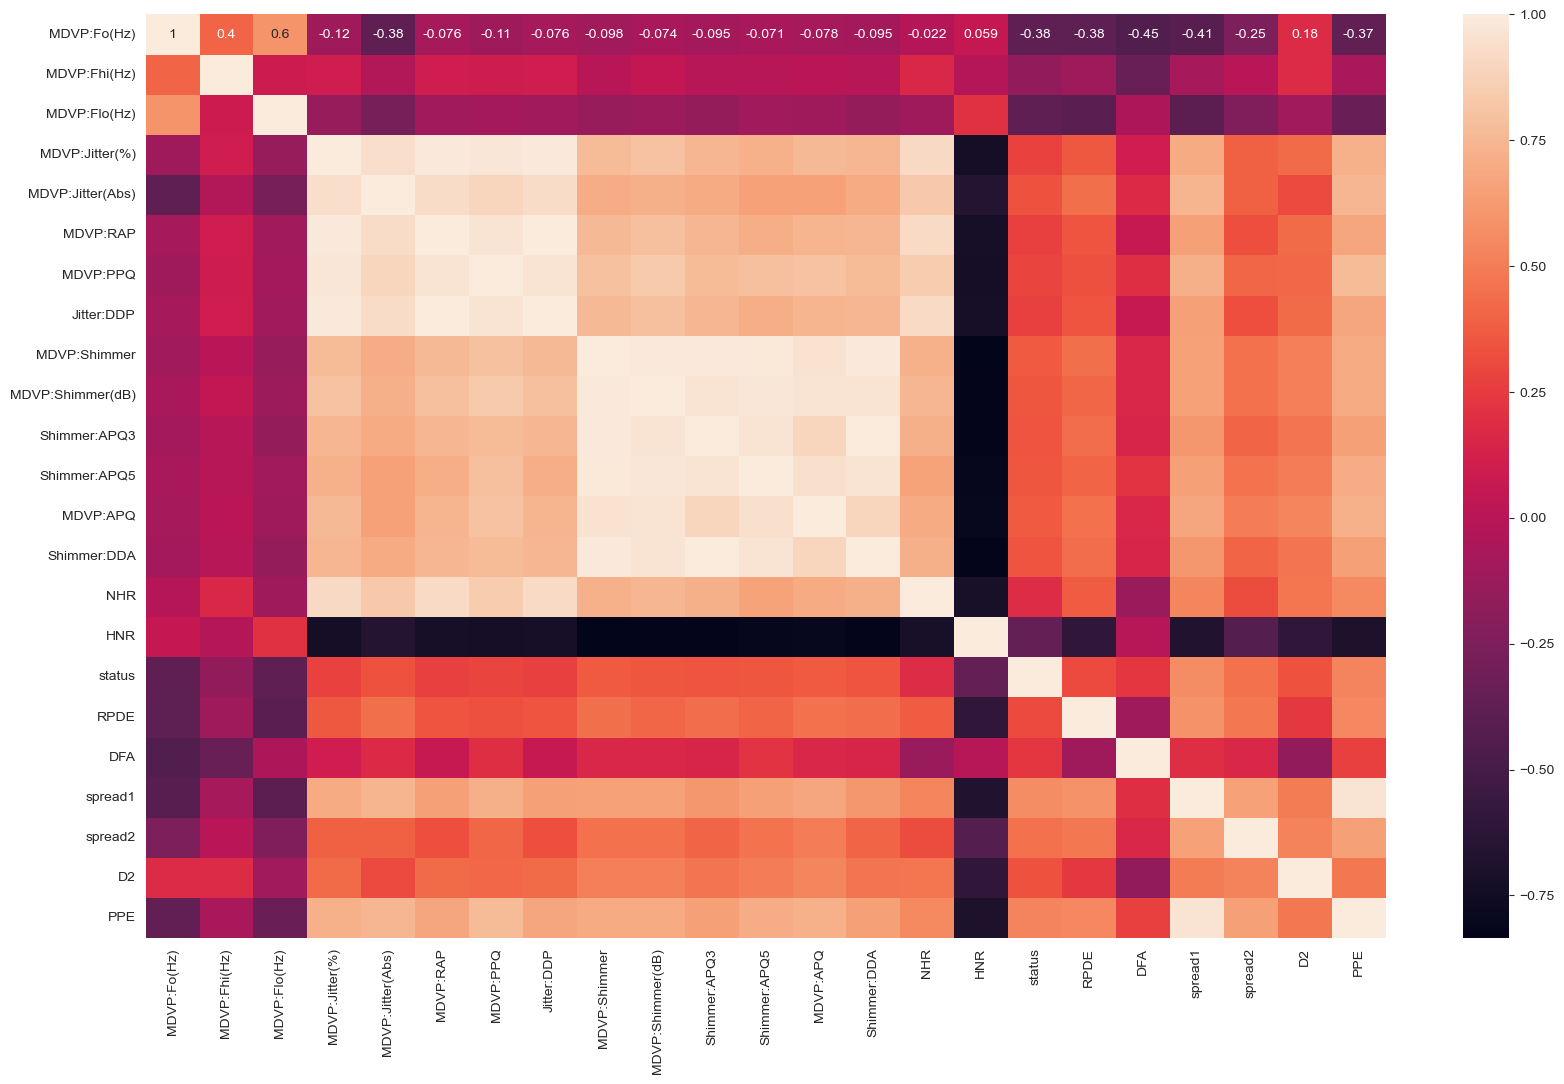

In [ ]:
# Exclude non-numeric columns before computing correlation
numeric_columns = pdata.select_dtypes(include=[np.number]).columns
correlation_matrix = pdata[numeric_columns].corr()
print(correlation_matrix)
# Plot correlation matrix
sns.set_context(font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True)

# Observations
* We can observe that there is a weak positive correlation between all the three non linear measurements of fundamental frequency ie, spread1, spread2 and PPE with that of status.
* MDVP:Jitter % has high degree of correlation with attributes such as Jitter:DDP,MDVP.PPQ,MDVP:RAP,MDVP:JITTER(Abs),NHR this may be because they are used in calculation of MDVP:Jitter % directly or indirectly.
* Amplitude measures such as MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA are highly correlated.
* Noise components such as NNR, HNR have strong positve and negetive correlation respectively with frequency and amplitude measures.  


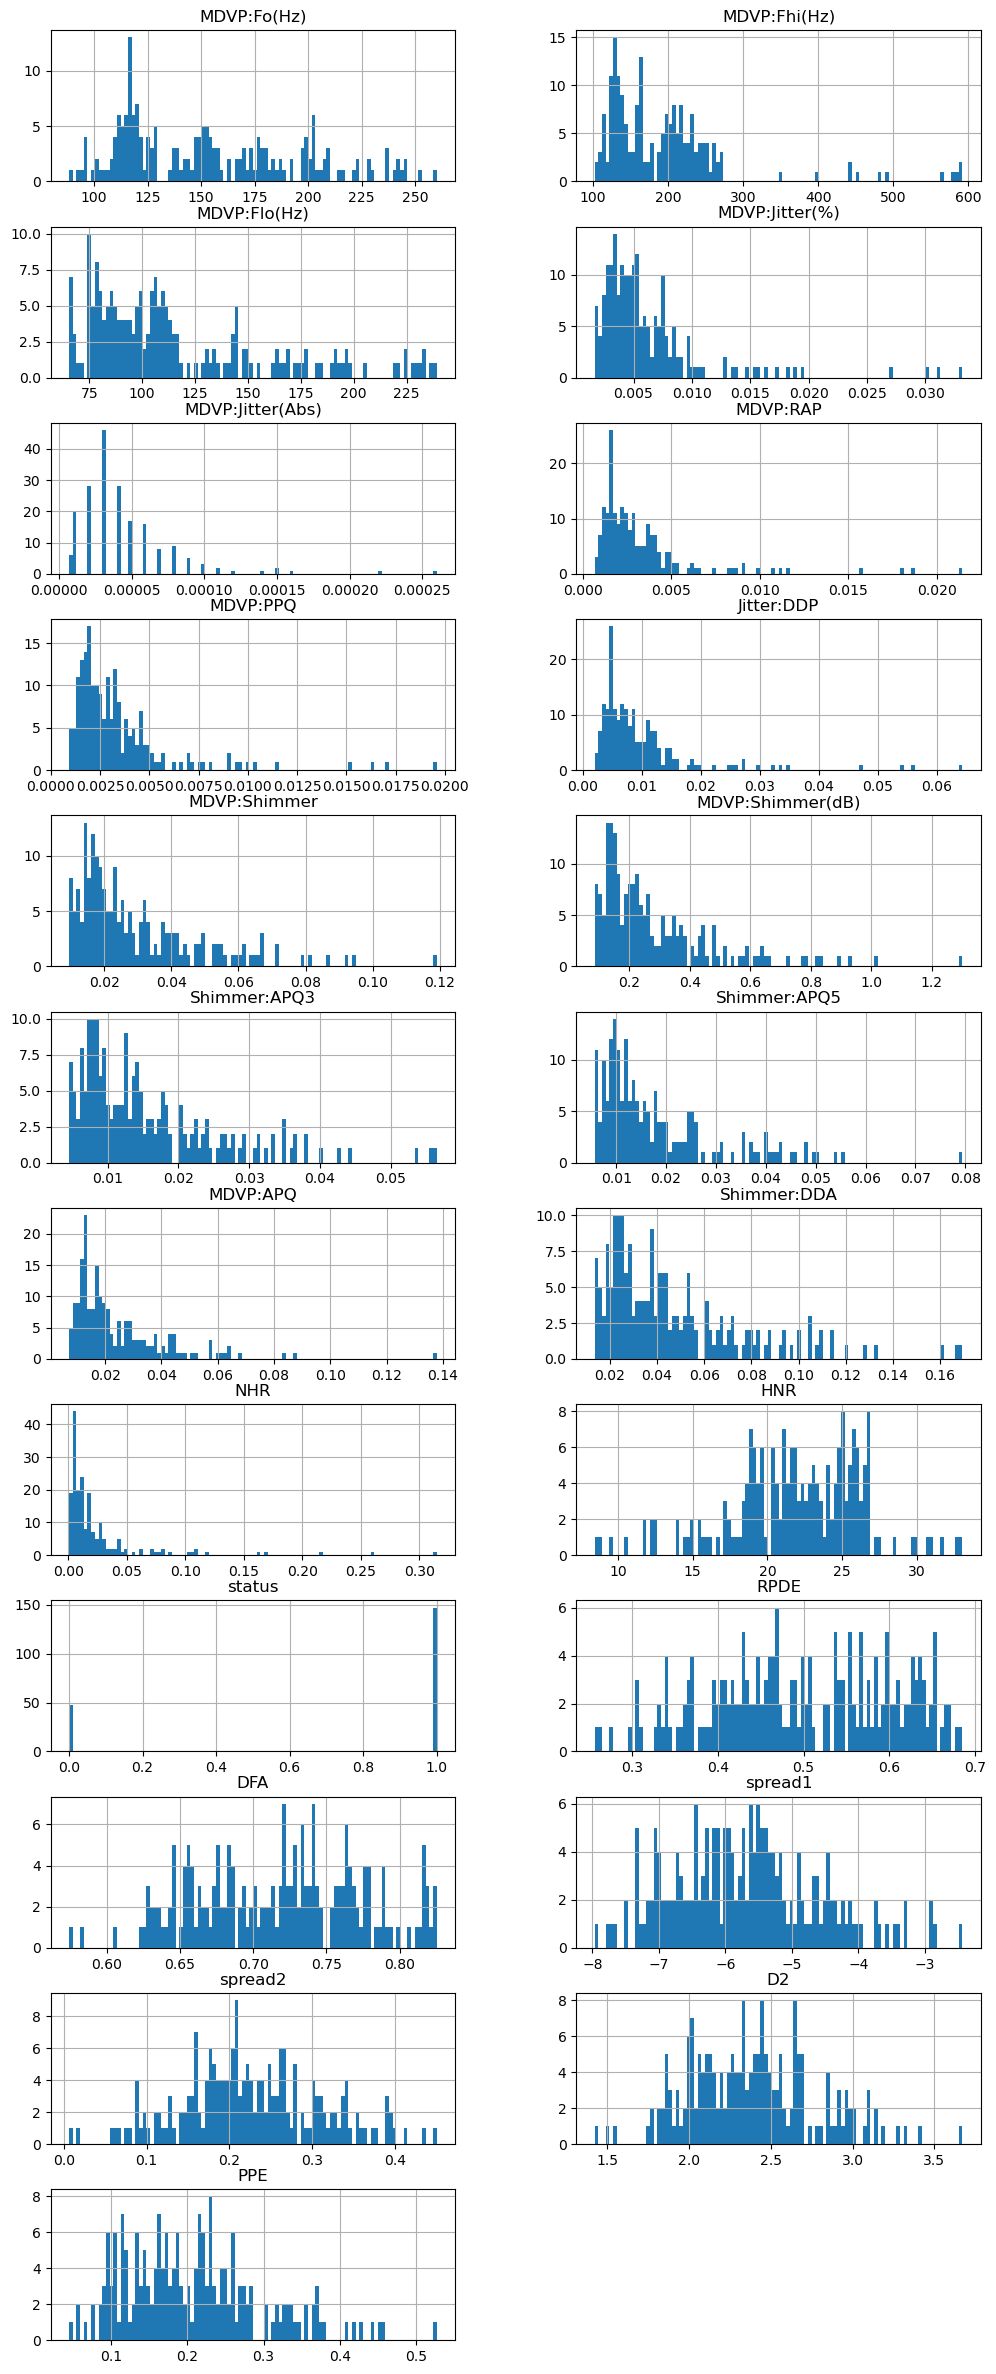

In [9]:
columns=list(pdata)[:]
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30),layout=(12,2));


# Observations:
* Both Frequency and amplitude attributes are sqewed to the left.
* Only spread 2 is normally distributed.

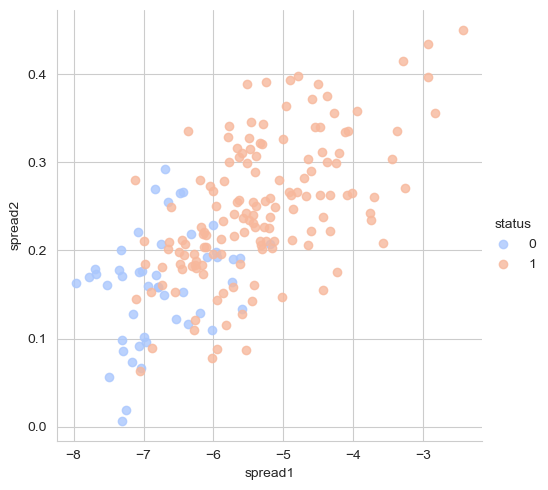

In [64]:
sns.set_style('whitegrid')
sns.lmplot(x='spread1',y='spread2',data=pdata, hue='status', palette='coolwarm',fit_reg=False);

# Observations
* From the previous histogram we can say that spread 2 is normally distributed and there are many people who have their spread 2 value between 0.1 to 0.3
* Spread 1 data is slightly skewed to the left which means there are many people whose spread 2 value fall in the range -7 to -4
* From the Lm plot we can say that people with spread1 value -7 to-4 and spread 2 value 0.1 to 0.4 are having higher probability of getting parkinsons


<Axes: xlabel='status', ylabel='NHR'>

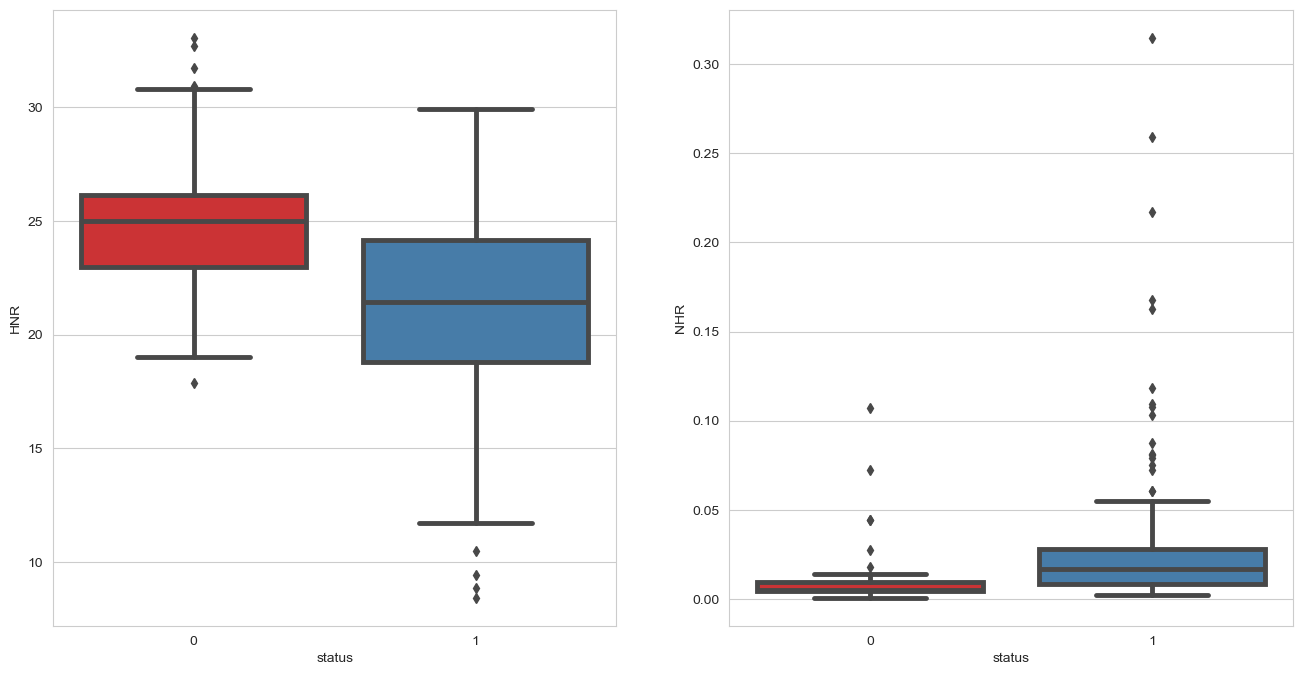

In [11]:
fig, ax = plt.subplots(ncols=2,figsize=(16,8))
sns.boxplot(x='status',y='HNR',data=pdata,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='NHR',data=pdata,palette="Set1",ax=ax[1])

# Observations
* People with high values of NHR and low values of HNR are having higher probability of getting Parkinson disease.

<Axes: xlabel='status', ylabel='MDVP:Shimmer'>

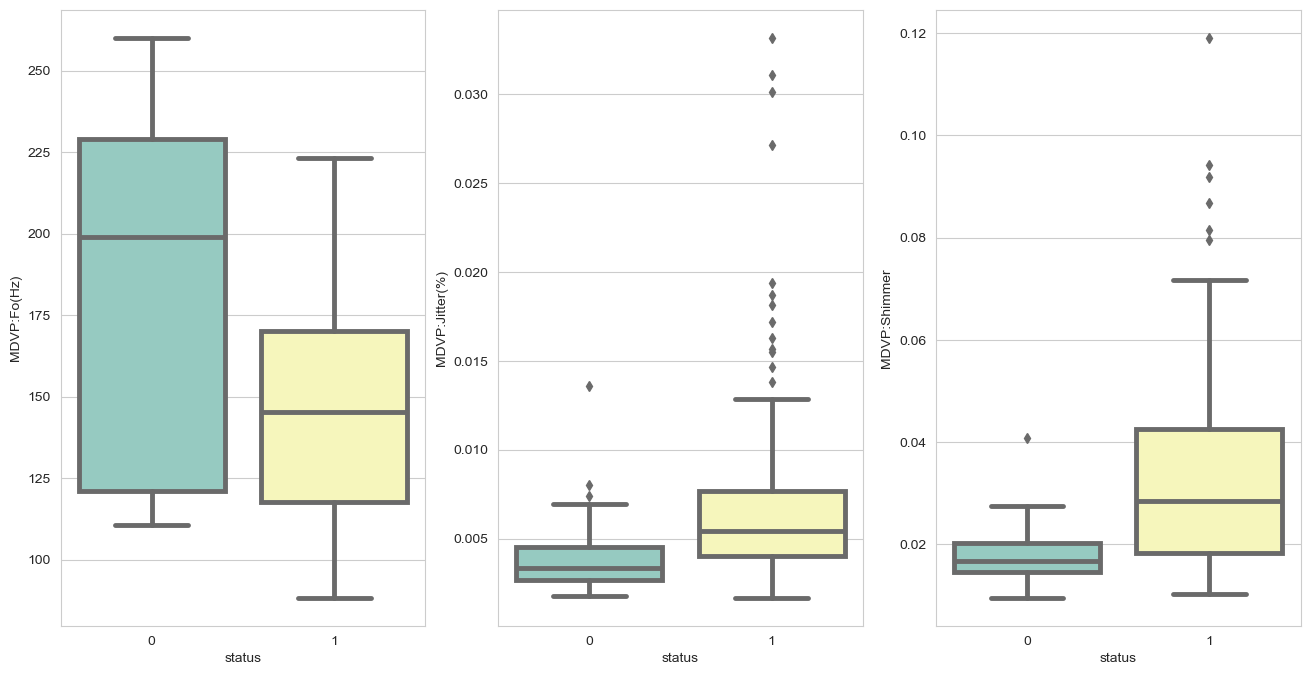

In [12]:
fig, ax = plt.subplots(ncols=3,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=pdata,palette="Set3",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=pdata,palette="Set3",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Shimmer',data=pdata,palette="Set3",ax=ax[2])

# Observations
* People with parkinsons have Median value of Average vocal fundamental frequency of arround 145Hz where as people who donot have parkinson has arround 200Hz.
* People with higher values of jitter %(Fundamental Frequency parameter) and MDVP Shimmer(Amplitude Parameter) values has higher probability of getting the disease. 
    
    

# Splitting the data into test and train

In [13]:
from sklearn.model_selection import train_test_split
pdata=pdata.drop(['name'], axis=1)

In [14]:
pdata.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
X=pdata.drop(['status'],axis=1)
y=pdata[['status']]

In [16]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [17]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [18]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,2.960595e-17,-2.277381e-16,1.047595e-16,1.821904e-17,9.109522e-17,-1.275333e-16,6.376666e-17,7.287618e-17,2.368476e-16,-1.639714e-16,...,-6.832142e-17,-1.693802e-16,1.093143e-16,8.198570e-16,-1.093143e-16,6.558856e-16,1.202457e-15,-1.138690e-16,-5.921189e-16,1.366428e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,-1.014787e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,-6.881025e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,-3.151160e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,3.485429e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,5.246243e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


In [19]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [20]:
total_affected = len(pdata.loc[pdata['status'] == 1])
total_not_affected = len(pdata.loc[pdata['status'] == 0])
total_count = len(pdata.index)

training_affected = len(y_train[y_train['status'] == 1])
training_not_affected = len(y_train[y_train['status'] == 0])
training_count = len(y_train)

testing_affected = len(y_test[y_test['status'] == 1])
testing_not_affected = len(y_test[y_test['status'] == 0])
testing_count = len(y_test)

print("Total no of people affected by Parkinsons disease    :", total_affected, "(", total_affected / total_count * 100, "%)")
print("Total no of people not affected by Parkinsons disease  :", total_not_affected, "(", total_not_affected / total_count * 100, "%)\n")
print("Training Data: people affected by Parkinsons disease   :", training_affected, "(", training_affected / training_count * 100, "%)")
print("Training Data: people not affected by Parkinsons disease   :", training_not_affected, "(", training_not_affected / training_count * 100, "%)\n")
print("Testing data: people affected by Parkinsons disease      :", testing_affected, "(", testing_affected / testing_count * 100, "%)")
print("Testing data: people not affected by Parkinsons disease      :", testing_not_affected, "(", testing_not_affected / testing_count * 100, "%)\n")


Total no of people affected by Parkinsons disease    : 147 ( 75.38461538461539 %)
Total no of people not affected by Parkinsons disease  : 48 ( 24.615384615384617 %)

Training Data: people affected by Parkinsons disease   : 107 ( 78.67647058823529 %)
Training Data: people not affected by Parkinsons disease   : 29 ( 21.323529411764707 %)

Testing data: people affected by Parkinsons disease      : 40 ( 67.79661016949152 %)
Testing data: people not affected by Parkinsons disease      : 19 ( 32.20338983050847 %)



# I: Predicting values by "K Nearest Neighbor Method"

In [21]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [22]:
NNH.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [23]:
y_predict = NNH.predict(X_test)

In [24]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.864406779661017

In [25]:
predicted_labels = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print('The KNN model score is',NNH_score)

The KNN model score is 0.864406779661017


<Axes: >

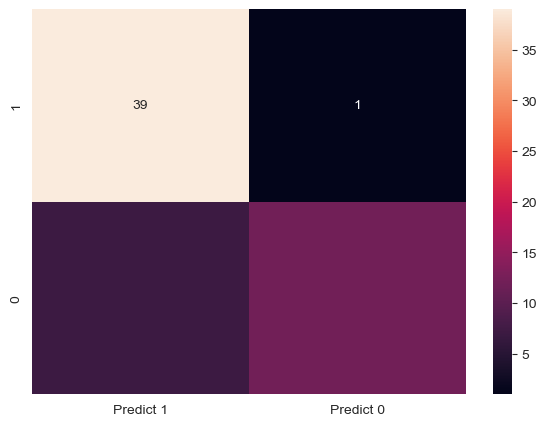

In [26]:
cm1=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True)

In [27]:
print(metrics.confusion_matrix(y_test, y_predict))

[[12  7]
 [ 1 39]]


In [28]:
TP1=39
TN1=12
FN1=1
FP1=7
print('ACCURACY of model is: ',(TP1+TN1)/float(TP1+TN1+FN1+FP1)*100)
print('SENSITIVITY of the model is: ',TP1 / float(TP1 + FN1)*100)
print('SPECIFICITY of the model is:',TN1 / float(TN1 + FP1)*100)
print('FALSE POSITIVE RATE of the model is: ',FP1 / float(TN1 + FP1)*100)
print('PRECISION of the model is: ',TP1 / float(TP1 + FP1)*100)

ACCURACY of model is:  86.4406779661017
SENSITIVITY of the model is:  97.5
SPECIFICITY of the model is: 63.1578947368421
FALSE POSITIVE RATE of the model is:  36.84210526315789
PRECISION of the model is:  84.78260869565217


In [29]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.92      0.63      0.75        19

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



# Comments:
* As we can observe that the model has very high sensitivity but speficity is not as good because of which the model accuracy has been reduced.
* This model has predicted false positives 7 times ie, it has dioganised people who are not suffering from parkinsons as suffering from parkinsons 7 times.

# II: Predicting values by "Logistic regression"

In [30]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.587161 -0.343231 -0.07146 -0.548654 -0.544395  0.356843 -0.185383   

          7         8         9  ...        13        14        15        16  \
0  0.357055  0.205411  0.209142  ...  0.051186 -0.191482 -0.044076 -0.197664   

         17        18        19        20        21  intercept  
0  0.256656  0.927061  0.101524  1.048216  0.644892     2.1418  

[1 rows x 23 columns]


In [31]:
model_score1 = model.score(X_train, y_train)
print("Training model score:",model_score1)

Training model score: 0.9044117647058824


In [32]:
model_score = model.score(X_test, y_test)
print('The logistic regression model score is',model_score)

The logistic regression model score is 0.8135593220338984


<Axes: >

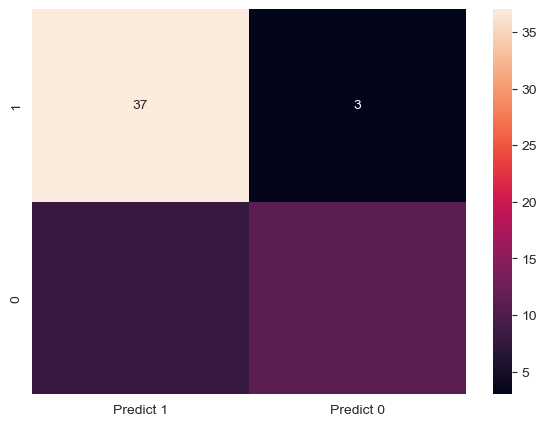

In [33]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [34]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11  8]
 [ 3 37]]


In [35]:
TP2=37
TN2=11
FN2=3
FP2=8
print('ACCURACY of model is: ',(TP2+TN2)/float(TP2+TN2+FN2+FP2)*100)
print('SENSITIVITY of the model is: ',TP2 / float(TP2 + FN2)*100)
print('SPECIFICITY of the model is:',TN2 / float(TN2 + FP2)*100)
print('FALSE POSITIVE RATE of the model is: ',FP2 / float(TN2 + FP2)*100)
print('PRECISION of the model is: ',TP2 / float(TP2 + FP2)*100)

ACCURACY of model is:  81.35593220338984
SENSITIVITY of the model is:  92.5
SPECIFICITY of the model is: 57.89473684210527
FALSE POSITIVE RATE of the model is:  42.10526315789473
PRECISION of the model is:  82.22222222222221


In [36]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        40
           0       0.79      0.58      0.67        19

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59



# Comments:
* As we can observe the model has performed worse than KNN this may be because the data is more distributed and we cannot see high degree of correlation between any of the attribute with that of status

# III: Predicting values by "Support Vector Machine"

In [37]:
from sklearn import svm
svmmodel = svm.SVC(gamma=0.1, C=10)   


In [38]:
svmmodel.fit(X_train , y_train.values.ravel())

SVC(C=10, gamma=0.1)

In [39]:
y_predicted = svmmodel.predict(X_test)

In [40]:
svmmodel_score1 = svmmodel.score(X_train, y_train)
print("Training model score:",svmmodel_score1)

Training model score: 1.0


In [41]:
svmmodel_score = svmmodel.score(X_test, y_test)
print('The SVM Model score is',svmmodel_score)

The SVM Model score is 0.8983050847457628


<Axes: >

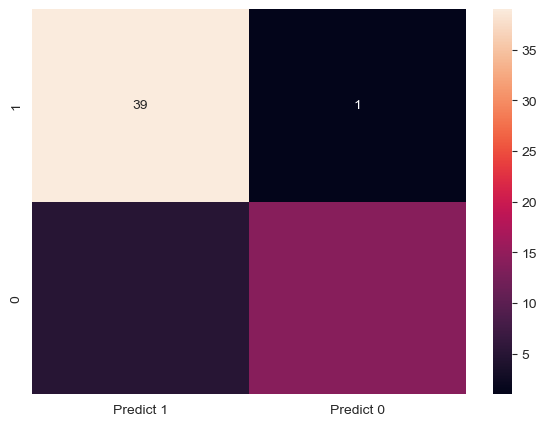

In [42]:
cm=metrics.confusion_matrix(y_test, y_predicted, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [43]:
TP3=39
TN3=14
FN3=1
FP3=5
print('ACCURACY of model is: ',(TP3+TN3)/float(TP3+TN3+FN3+FP3)*100)
print('SENSITIVITY of the model is: ',TP3 / float(TP3 + FN3)*100)
print('SPECIFICITY of the model is:',TN3 / float(TN3 + FP3)*100)
print('FALSE POSITIVE RATE of the model is: ',FP3 / float(TN3 + FP3)*100)
print('PRECISION of the model is: ',TP3 / float(TP3 + FP3)*100)

ACCURACY of model is:  89.83050847457628
SENSITIVITY of the model is:  97.5
SPECIFICITY of the model is: 73.68421052631578
FALSE POSITIVE RATE of the model is:  26.31578947368421
PRECISION of the model is:  88.63636363636364


In [44]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        40
           0       0.93      0.74      0.82        19

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59



# Comments:
* As we can see there is slight problem of overfitting here 
* Even though the model performs good on training data it fails in testing data

# IV Predicting by Decision Tree Classifer

In [46]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [47]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.864406779661017


# Comments:
* As we can see model is slightly over fitting so we can increase accuracy by reducing number of branches in decision tree.

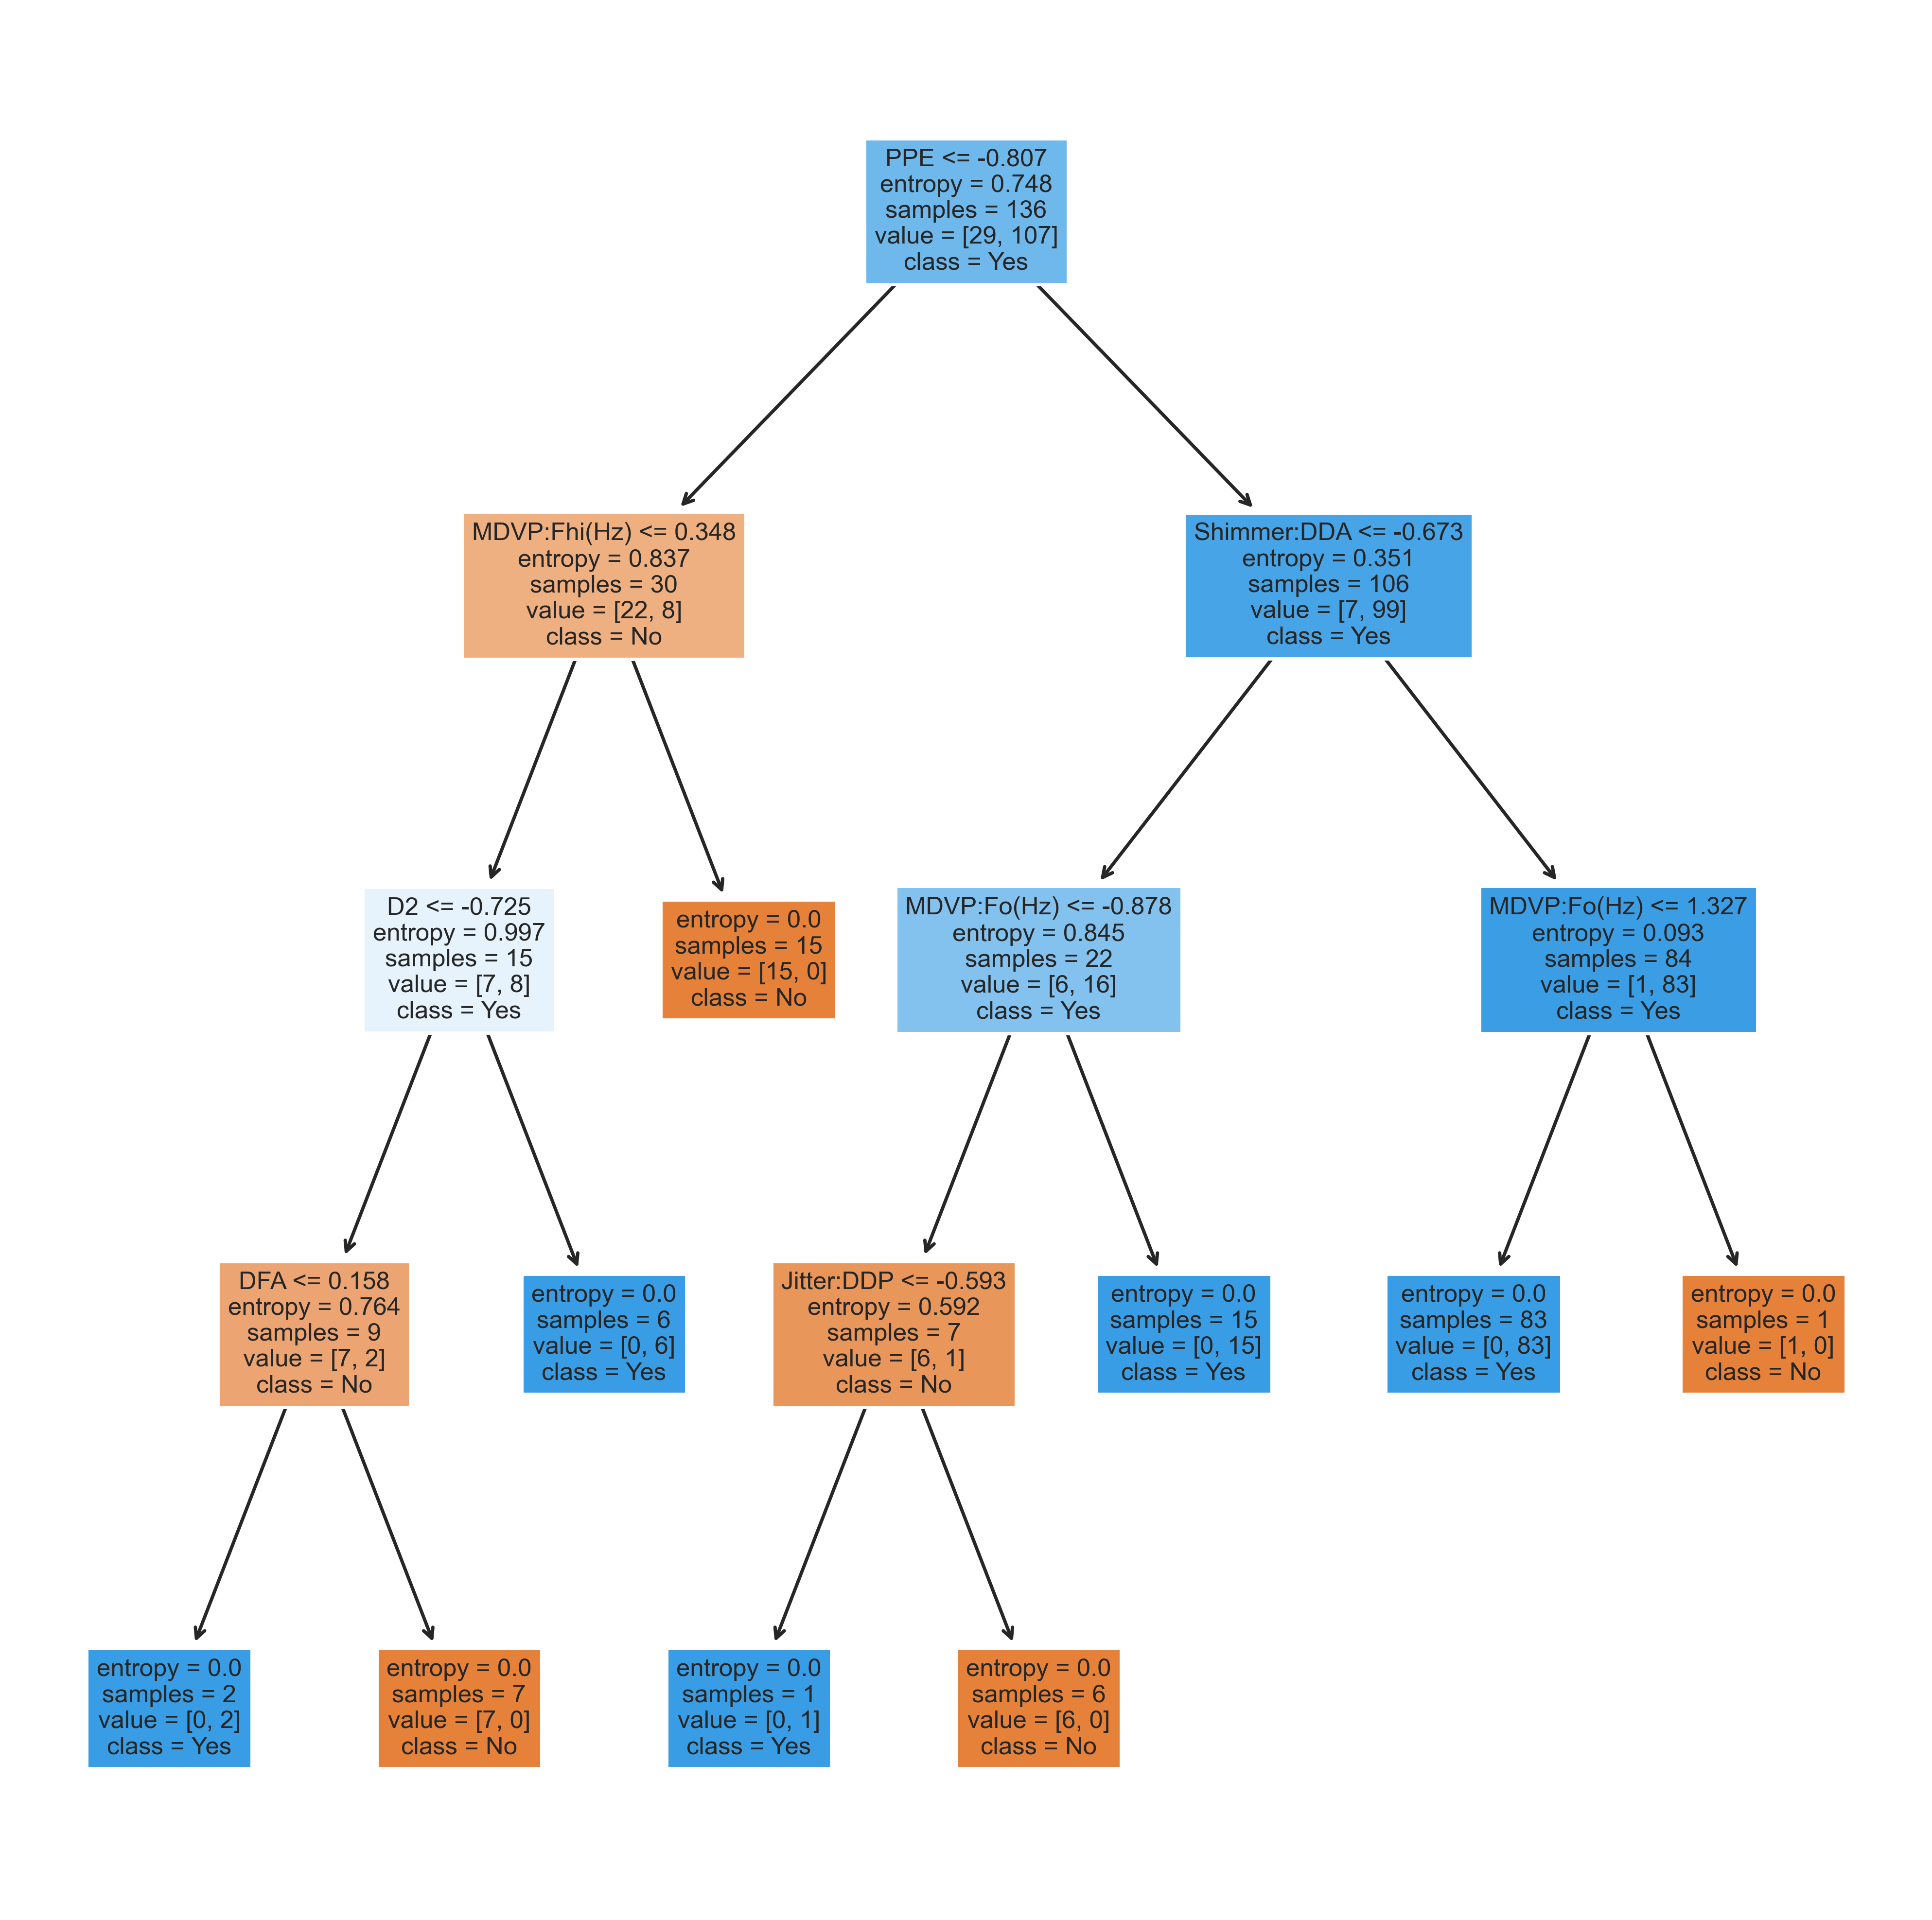

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [49]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))
dtreeRScore=dTreeR.score(X_test, y_test)

0.9779411764705882
0.8983050847457628


# Comments:
* As we can see there is significant amount of increase in accuracy than the previous tree with 5 branches


# Confusion Matrix for decision tree with 5 branches:

In [50]:
ytree_pred = dTree.predict(X_test)
ytree_pred1= dTreeR.predict(X_test)

<Axes: >

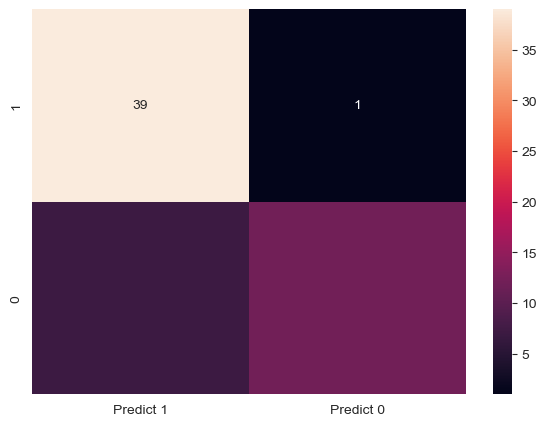

In [51]:
cm=metrics.confusion_matrix(y_test, ytree_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [52]:
TP=39
TN=12
FN=1
FP=7
print('ACCURACY of model is: ',(TP+TN)/float(TP+TN+FN+FP)*100)
print('SENSITIVITY of the model is: ',TP / float(TP + FN)*100)
print('SPECIFICITY of the model is:',TN / float(TN + FP)*100)
print('FALSE POSITIVE RATE of the model is: ',FP / float(TN + FP)*100)
print('PRECISION of the model is: ',TP / float(TP + FP)*100)

ACCURACY of model is:  86.4406779661017
SENSITIVITY of the model is:  97.5
SPECIFICITY of the model is: 63.1578947368421
FALSE POSITIVE RATE of the model is:  36.84210526315789
PRECISION of the model is:  84.78260869565217


# Confusion Matrix for decision tree with 3 branches:

<Axes: >

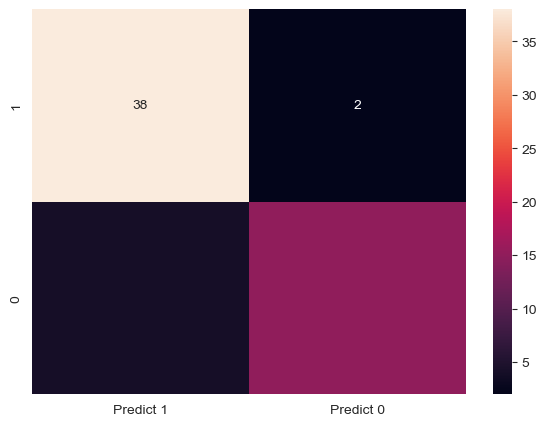

In [53]:
cm=metrics.confusion_matrix(y_test, ytree_pred1, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [54]:
TP5=38
TN5=15
FN5=2
FP5=4
print('ACCURACY of model is: ',(TP5+TN5)/float(TP5+TN5+FN5+FP5)*100)
print('SENSITIVITY of the model is: ',TP5 / float(TP5 + FN5)*100)
print('SPECIFICITY of the model is:',TN5 / float(TN5 + FP5)*100)
print('FALSE POSITIVE RATE of the model is: ',FP5 / float(TN5 + FP5)*100)
print('PRECISION of the model is: ',TP5 / float(TP5 + FP5)*100)

ACCURACY of model is:  89.83050847457628
SENSITIVITY of the model is:  95.0
SPECIFICITY of the model is: 78.94736842105263
FALSE POSITIVE RATE of the model is:  21.052631578947366
PRECISION of the model is:  90.47619047619048


# Comments:
* As we can observe that there is not only increase in accuracy but also Specificity of the model and hence Decision Tree Classifier with 3 branches perform better.

In [55]:
print('The KNN model score is \n',NNH_score)
print('The logistic regression model score is\n',model_score)
print('The SVM Model score is\n',svmmodel_score)
print('The Decision tree model score is\n',dtreeRScore)

The KNN model score is 
 0.864406779661017
The logistic regression model score is
 0.8135593220338984
The SVM Model score is
 0.8983050847457628
The Decision tree model score is
 0.8983050847457628


# Final Comments:
* Here 2 models have same accuracy ie, SVM and Decision tree.